In [3]:
# Importing the Keras libraries and packages

from keras.applications import VGG16
from keras.applications import ResNet50
from keras.applications import MobileNet
from keras.models import Model
from keras.preprocessing import image
from tensorflow.keras.layers import Input, Lambda ,Dense ,Flatten ,Dropout
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
from sklearn.metrics import classification_report, accuracy_score, f1_score

train_dir = "SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/training"
eval_dir = "SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/test"

In [4]:
#Helper function to load images from given directories
def load_images(directory):
    images = []
    labels = []
    for idx, label in enumerate(uniq_labels):
        for file in os.listdir(directory + "/" + label):
            filepath = directory + "/" + label + "/" + file
            image = cv2.resize(cv2.imread(filepath), (64, 64))
            images.append(image)
            labels.append(idx)
    images = np.array(images)
    labels = np.array(labels)
    return(images, labels)

In [5]:
import keras
uniq_labels = sorted(os.listdir(train_dir))
images, labels = load_images(directory = train_dir)

if uniq_labels == sorted(os.listdir(eval_dir)):
    X_eval, y_eval = load_images(directory = eval_dir)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, stratify = labels)

n = len(uniq_labels)
train_n = len(X_train)
test_n = len(X_test)

print("Total number of symbols: ", n)
print("Number of training images: " , train_n)
print("Number of testing images: ", test_n)

eval_n = len(X_eval)
print("Number of evaluation images: ", eval_n)

Total number of symbols:  26
Number of training images:  374
Number of testing images:  94
Number of evaluation images:  26


In [7]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
y_eval = keras.utils.to_categorical(y_eval)

In [8]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0
X_eval = X_eval.astype('float32')/255.0

In [9]:
#Initialising vgg16
classifier_resnet = ResNet50(input_shape= (64,64,3),include_top=False,weights='imagenet')
#Initialising vgg16
classifier_vgg16 = VGG16(input_shape= (64,64,3),include_top=False,weights='imagenet')
#Initialising mobileNet
classifier_mobilenet = MobileNet(input_shape= (64,64,3),include_top=False,weights='imagenet')

In [10]:
#don't train existing weights for vgg16
for layer in classifier_vgg16.layers:
    layer.trainable = False

#don't train existing weights for resnet50
for layer in classifier_resnet.layers:
    layer.trainable = False
#don't train existing weights for resnet50
for layer in classifier_mobilenet.layers:
    layer.trainable = False

In [11]:
classifier1 = classifier_vgg16.output#head mode
classifier1 = Flatten()(classifier1)#adding layer of flatten
classifier1 = Dense(units=256, activation='relu')(classifier1)
classifier1 = Dropout(0.6)(classifier1)
classifier1 = Dense(units=26, activation='softmax')(classifier1)

model1 = Model(inputs = classifier_vgg16.input , outputs = classifier1)
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

classifier2 = classifier_resnet.output#head mode

classifier2 = Flatten()(classifier2)#adding layer of flatten
classifier2 = Dropout(0.6)(classifier2)
classifier2 = Dense(units=26, activation='softmax')(classifier2)

model2 = Model(inputs = classifier_resnet.input , outputs = classifier2)
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

classifier3 = classifier_mobilenet.output#head mode
classifier3 = Flatten()(classifier3)#adding layer of flatten
classifier3 = Dropout(0.6)(classifier3)
classifier3 = Dense(units=26, activation='softmax')(classifier3)

model3 = Model(inputs = classifier_mobilenet.input , outputs = classifier3)
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
#fit the model
#it will take some time to train
history_vgg = model1.fit(X_train, y_train, epochs =30, batch_size = 64,validation_data=(X_test,y_test))

Epoch 1/30
6/6 [==============================] - 5s 757ms/step - loss: 3.5017 - accuracy: 0.0588 - val_loss: 2.8687 - val_accuracy: 0.3298
Epoch 2/30
6/6 [==============================] - 4s 663ms/step - loss: 2.8775 - accuracy: 0.1711 - val_loss: 2.5724 - val_accuracy: 0.4362
Epoch 3/30
6/6 [==============================] - 4s 690ms/step - loss: 2.5735 - accuracy: 0.3262 - val_loss: 2.2181 - val_accuracy: 0.5638
Epoch 4/30
6/6 [==============================] - 5s 859ms/step - loss: 2.2783 - accuracy: 0.3717 - val_loss: 1.8951 - val_accuracy: 0.6809
Epoch 5/30
6/6 [==============================] - 5s 813ms/step - loss: 1.9499 - accuracy: 0.4893 - val_loss: 1.6204 - val_accuracy: 0.7447
Epoch 6/30
6/6 [==============================] - 4s 680ms/step - loss: 1.7457 - accuracy: 0.5080 - val_loss: 1.4126 - val_accuracy: 0.8298
Epoch 7/30
6/6 [==============================] - 4s 663ms/step - loss: 1.5826 - accuracy: 0.5267 - val_loss: 1.2507 - val_accuracy: 0.8191
Epoch 8/30
6/6 [====

In [13]:
#fit the model
#it will take some time to train
history_resnet = model2.fit(X_train, y_train, epochs =30, batch_size = 64,validation_data=(X_test,y_test))

Epoch 1/30
6/6 [==============================] - 7s 565ms/step - loss: 3.6387 - accuracy: 0.0535 - val_loss: 3.2445 - val_accuracy: 0.0319
Epoch 2/30
6/6 [==============================] - 2s 326ms/step - loss: 3.5583 - accuracy: 0.0455 - val_loss: 3.2386 - val_accuracy: 0.0532
Epoch 3/30
6/6 [==============================] - 2s 366ms/step - loss: 3.4914 - accuracy: 0.0455 - val_loss: 3.2083 - val_accuracy: 0.0851
Epoch 4/30
6/6 [==============================] - 2s 365ms/step - loss: 3.3963 - accuracy: 0.0508 - val_loss: 3.1808 - val_accuracy: 0.1702
Epoch 5/30
6/6 [==============================] - 2s 345ms/step - loss: 3.4206 - accuracy: 0.0455 - val_loss: 3.1629 - val_accuracy: 0.1809
Epoch 6/30
6/6 [==============================] - 2s 309ms/step - loss: 3.3711 - accuracy: 0.0428 - val_loss: 3.1461 - val_accuracy: 0.1489
Epoch 7/30
6/6 [==============================] - 2s 338ms/step - loss: 3.2816 - accuracy: 0.0695 - val_loss: 3.1256 - val_accuracy: 0.2021
Epoch 8/30
6/6 [====

In [14]:
#fit the model
#it will take some time to train
history_mobilenet = model3.fit(X_train, y_train, epochs =30, batch_size = 64,validation_data=(X_test,y_test))

Epoch 1/30
6/6 [==============================] - 3s 195ms/step - loss: 6.4272 - accuracy: 0.0856 - val_loss: 2.1735 - val_accuracy: 0.3723
Epoch 2/30
6/6 [==============================] - 0s 88ms/step - loss: 3.3795 - accuracy: 0.3289 - val_loss: 1.2336 - val_accuracy: 0.5851
Epoch 3/30
6/6 [==============================] - 0s 83ms/step - loss: 1.6072 - accuracy: 0.5963 - val_loss: 0.6616 - val_accuracy: 0.7340
Epoch 4/30
6/6 [==============================] - 0s 82ms/step - loss: 0.8566 - accuracy: 0.7487 - val_loss: 0.5564 - val_accuracy: 0.7872
Epoch 5/30
6/6 [==============================] - 1s 85ms/step - loss: 0.5594 - accuracy: 0.8289 - val_loss: 0.4060 - val_accuracy: 0.8617
Epoch 6/30
6/6 [==============================] - 1s 95ms/step - loss: 0.4612 - accuracy: 0.8690 - val_loss: 0.2926 - val_accuracy: 0.9149
Epoch 7/30
6/6 [==============================] - 1s 89ms/step - loss: 0.4044 - accuracy: 0.8850 - val_loss: 0.2444 - val_accuracy: 0.9255
Epoch 8/30
6/6 [==========

In [15]:
# Saving the model of vgg16
model1.save('model_vgg16.h5')
# Saving the model of resnet
model2.save('model_resnet.h5')
# Saving the model of mobilenet
model3.save('model_mobilenet.h5')

In [18]:
score = model1.evaluate(x = X_test, y = y_test, verbose = 0)
print('Accuracy for test images:', round(score[1]*100, 3), '%')
score = model1.evaluate(x = X_eval, y = y_eval, verbose = 0)
print('Accuracy for evaluation images:', round(score[1]*100, 3), '%')


# Evaluate VGG model
y_pred_vgg = model1.predict(X_test)
y_pred_vgg_classes = np.argmax(y_pred_vgg, axis=1)
y_true_vgg_classes = np.argmax(y_test, axis=1)

print("VGG Model Classification Report:")
report = classification_report(y_true_vgg_classes, y_pred_vgg_classes, output_dict=True)
# Extract the macro average values
macro_precision = report['macro avg']['precision']
macro_recall = report['macro avg']['recall']
macro_f1_score = report['macro avg']['f1-score']
print("VGG Model Classification Report:")

print(f'Macro Precision: {macro_precision}')
print(f'Macro Recall: {macro_recall}')
print(f'Macro F1-Score: {macro_f1_score}')
accuracy_vgg = accuracy_score(y_true_vgg_classes, y_pred_vgg_classes)
f1_score_vgg = f1_score(y_true_vgg_classes, y_pred_vgg_classes, average='weighted')
print(f'VGG Model Accuracy: {accuracy_vgg}')
print(f'VGG Model F1 Score: {f1_score_vgg}')

Accuracy for test images: 96.809 %
Accuracy for evaluation images: 96.154 %
3/3 [==============================] - 1s 269ms/step
VGG Model Classification Report:
VGG Model Classification Report:
Macro Precision: 0.9750000000000001
Macro Recall: 0.9711538461538461
Macro F1-Score: 0.9694749694749696
VGG Model Accuracy: 0.9680851063829787
VGG Model F1 Score: 0.9677473826409997


In [21]:
score = model2.evaluate(x = X_test, y = y_test, verbose = 0)
print('Accuracy for test images:', round(score[1]*100, 3), '%')
score = model2.evaluate(x = X_eval, y = y_eval, verbose = 0)
print('Accuracy for evaluation images:', round(score[1]*100, 3), '%')

# Evaluate ResNet model
y_pred_resnet = model2.predict(X_test)
y_pred_resnet_classes = np.argmax(y_pred_resnet, axis=1)
y_true_resnet_classes = np.argmax(y_test, axis=1)

print("ResNet Model Classification Report:")
report = classification_report(y_true_resnet_classes, y_pred_resnet_classes, zero_division=1, output_dict=True)
macro_precision = report['macro avg']['precision']
macro_recall = report['macro avg']['recall']
macro_f1_score = report['macro avg']['f1-score']
print("ResNet Model Classification Report:")
print(f'Macro Precision: {macro_precision}')
print(f'Macro Recall: {macro_recall}')
print(f'Macro F1-Score: {macro_f1_score}')
accuracy_resnet = accuracy_score(y_true_resnet_classes, y_pred_resnet_classes)
f1_score_resnet = f1_score(y_true_resnet_classes, y_pred_resnet_classes, average='weighted')
print(f'ResNet Model Accuracy: {accuracy_resnet}')
print(f'ResNet Model F1 Score: {f1_score_resnet}')

Accuracy for test images: 44.681 %
Accuracy for evaluation images: 38.462 %
3/3 [==============================] - 1s 156ms/step
ResNet Model Classification Report:
ResNet Model Classification Report:
Macro Precision: 0.6659951159951161
Macro Recall: 0.4487179487179487
Macro F1-Score: 0.41209965248426783
ResNet Model Accuracy: 0.44680851063829785
ResNet Model F1 Score: 0.4102966773179539


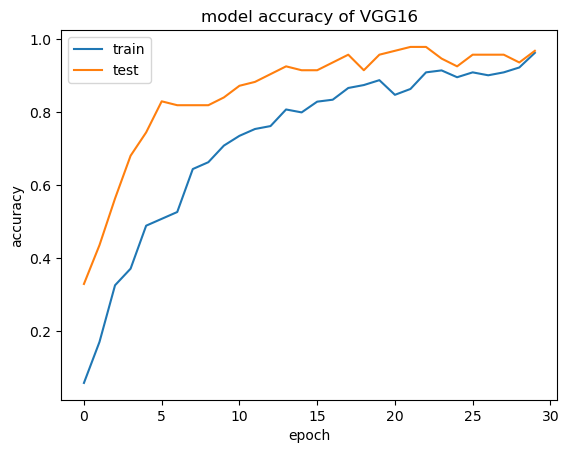

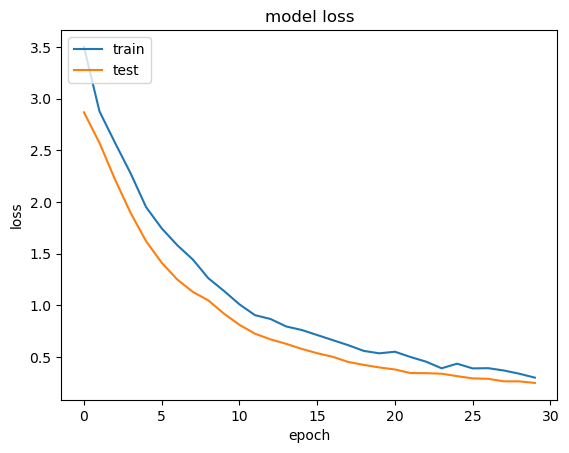

In [24]:
# VGG16 accuracy and loss plot

#VGG16
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history_vgg.history['accuracy'])
plt.plot(history_vgg.history['val_accuracy'])
plt.title('model accuracy of VGG16')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss

plt.plot(history_vgg.history['loss'])
plt.plot(history_vgg.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

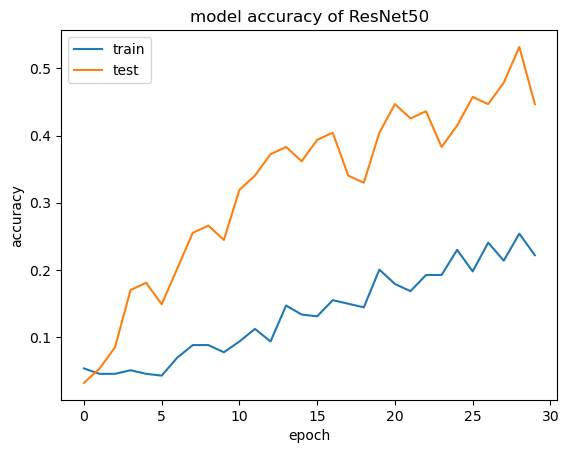

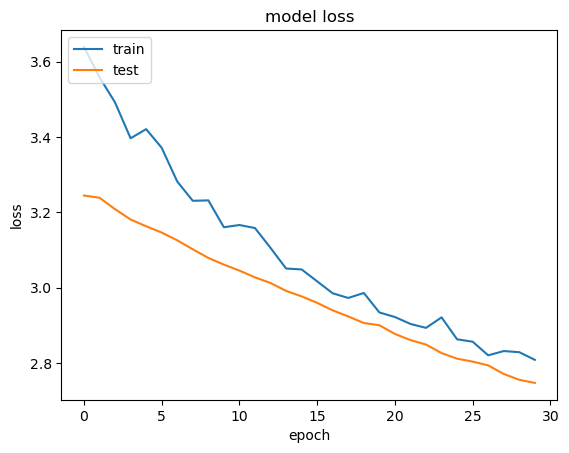

In [25]:
# resnet50 accuracy and loss plot

#ResNet50
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history_resnet.history['accuracy'])
plt.plot(history_resnet.history['val_accuracy'])
plt.title('model accuracy of ResNet50')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss

plt.plot(history_resnet.history['loss'])
plt.plot(history_resnet.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

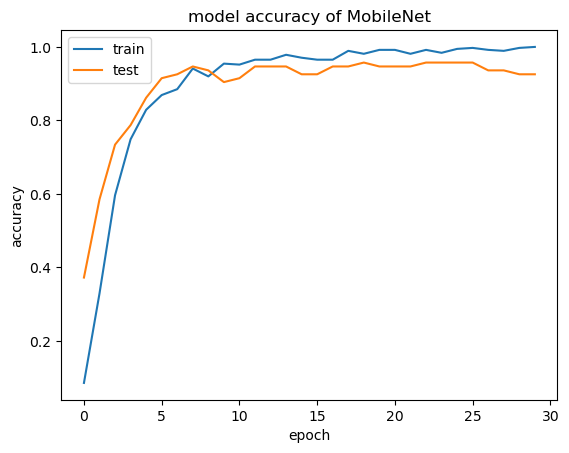

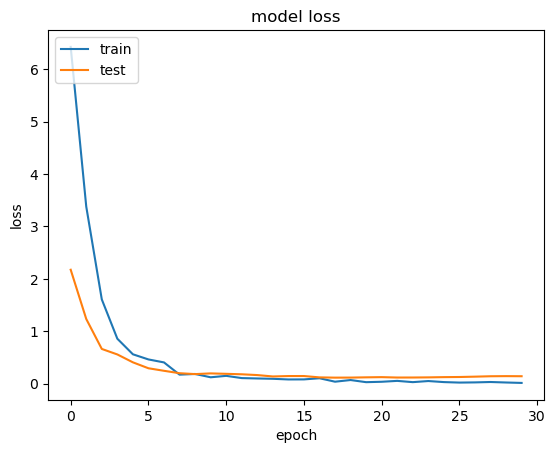

In [26]:
# MobileNet accuracy and loss plot

#vgg16
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history_mobilenet.history['accuracy'])
plt.plot(history_mobilenet.history['val_accuracy'])
plt.title('model accuracy of MobileNet')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss

plt.plot(history_mobilenet.history['loss'])
plt.plot(history_mobilenet.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

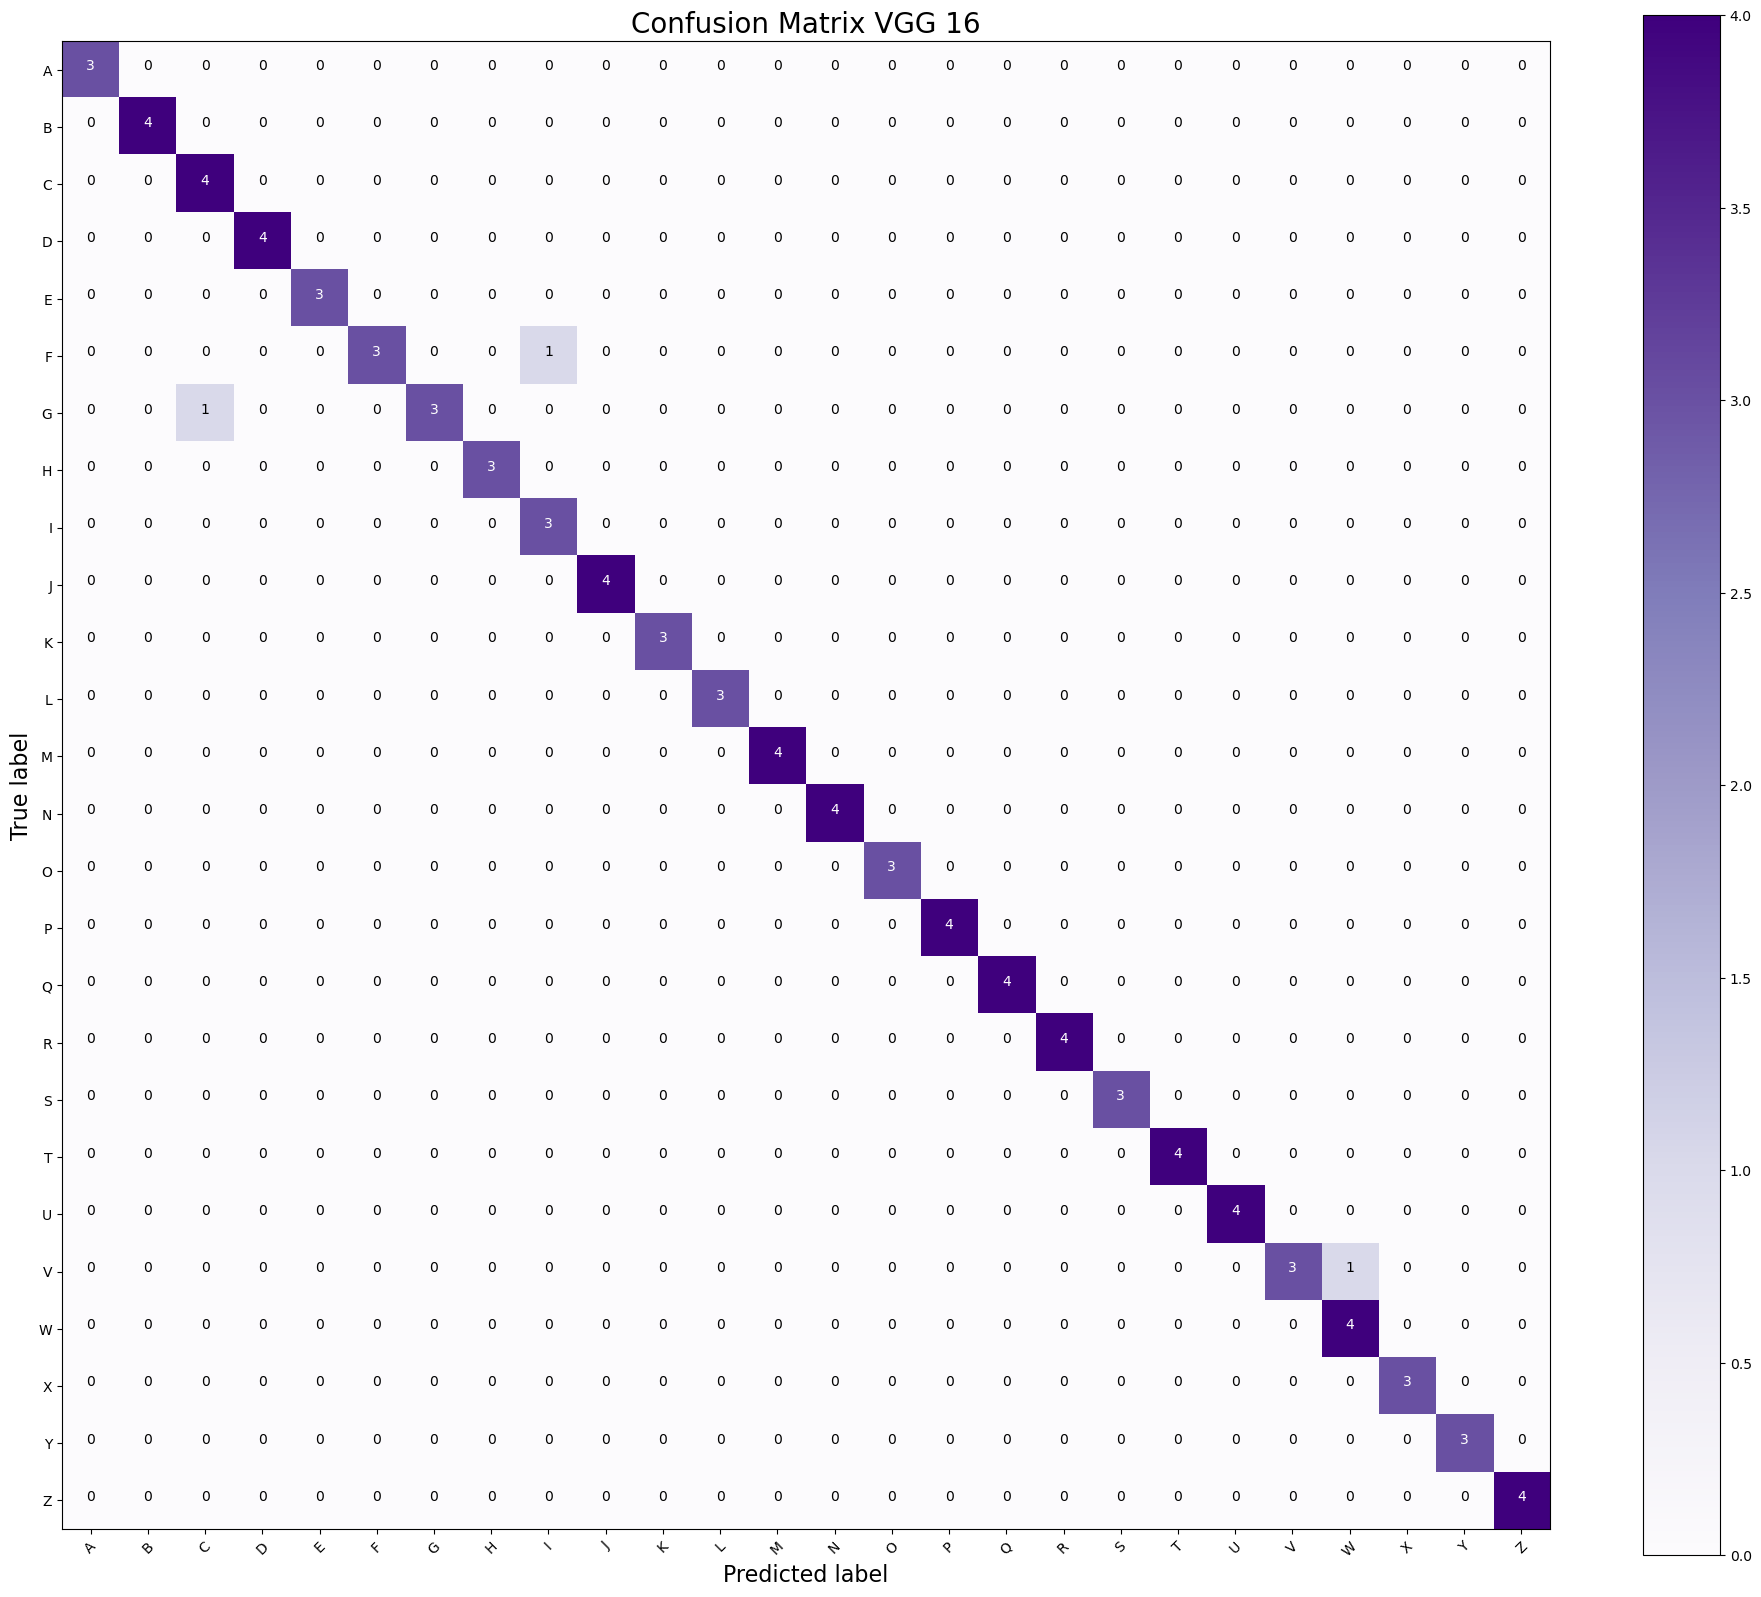

In [34]:
#Helper function to plot confusion matrix
def plot_confusion_matrix(y, y_pred):
    y = np.argmax(y, axis = 1)
    y_pred = np.argmax(y_pred, axis = 1)
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize = (24, 20))
    ax = plt.subplot()
    plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Purples)
    plt.colorbar()
    plt.title("Confusion Matrix VGG 16")
    tick_marks = np.arange(len(uniq_labels))
    plt.xticks(tick_marks, uniq_labels, rotation=45)
    plt.yticks(tick_marks, uniq_labels)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    ax.title.set_fontsize(20)
    ax.xaxis.label.set_fontsize(16)
    ax.yaxis.label.set_fontsize(16)
    limit = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment = "center",color = "white" if cm[i, j] > limit else "black")
    plt.show()

from sklearn.metrics import confusion_matrix
import itertools

y_test_pred = model1.predict(X_test, batch_size = 64, verbose = 0)
plot_confusion_matrix(y_test, y_test_pred)

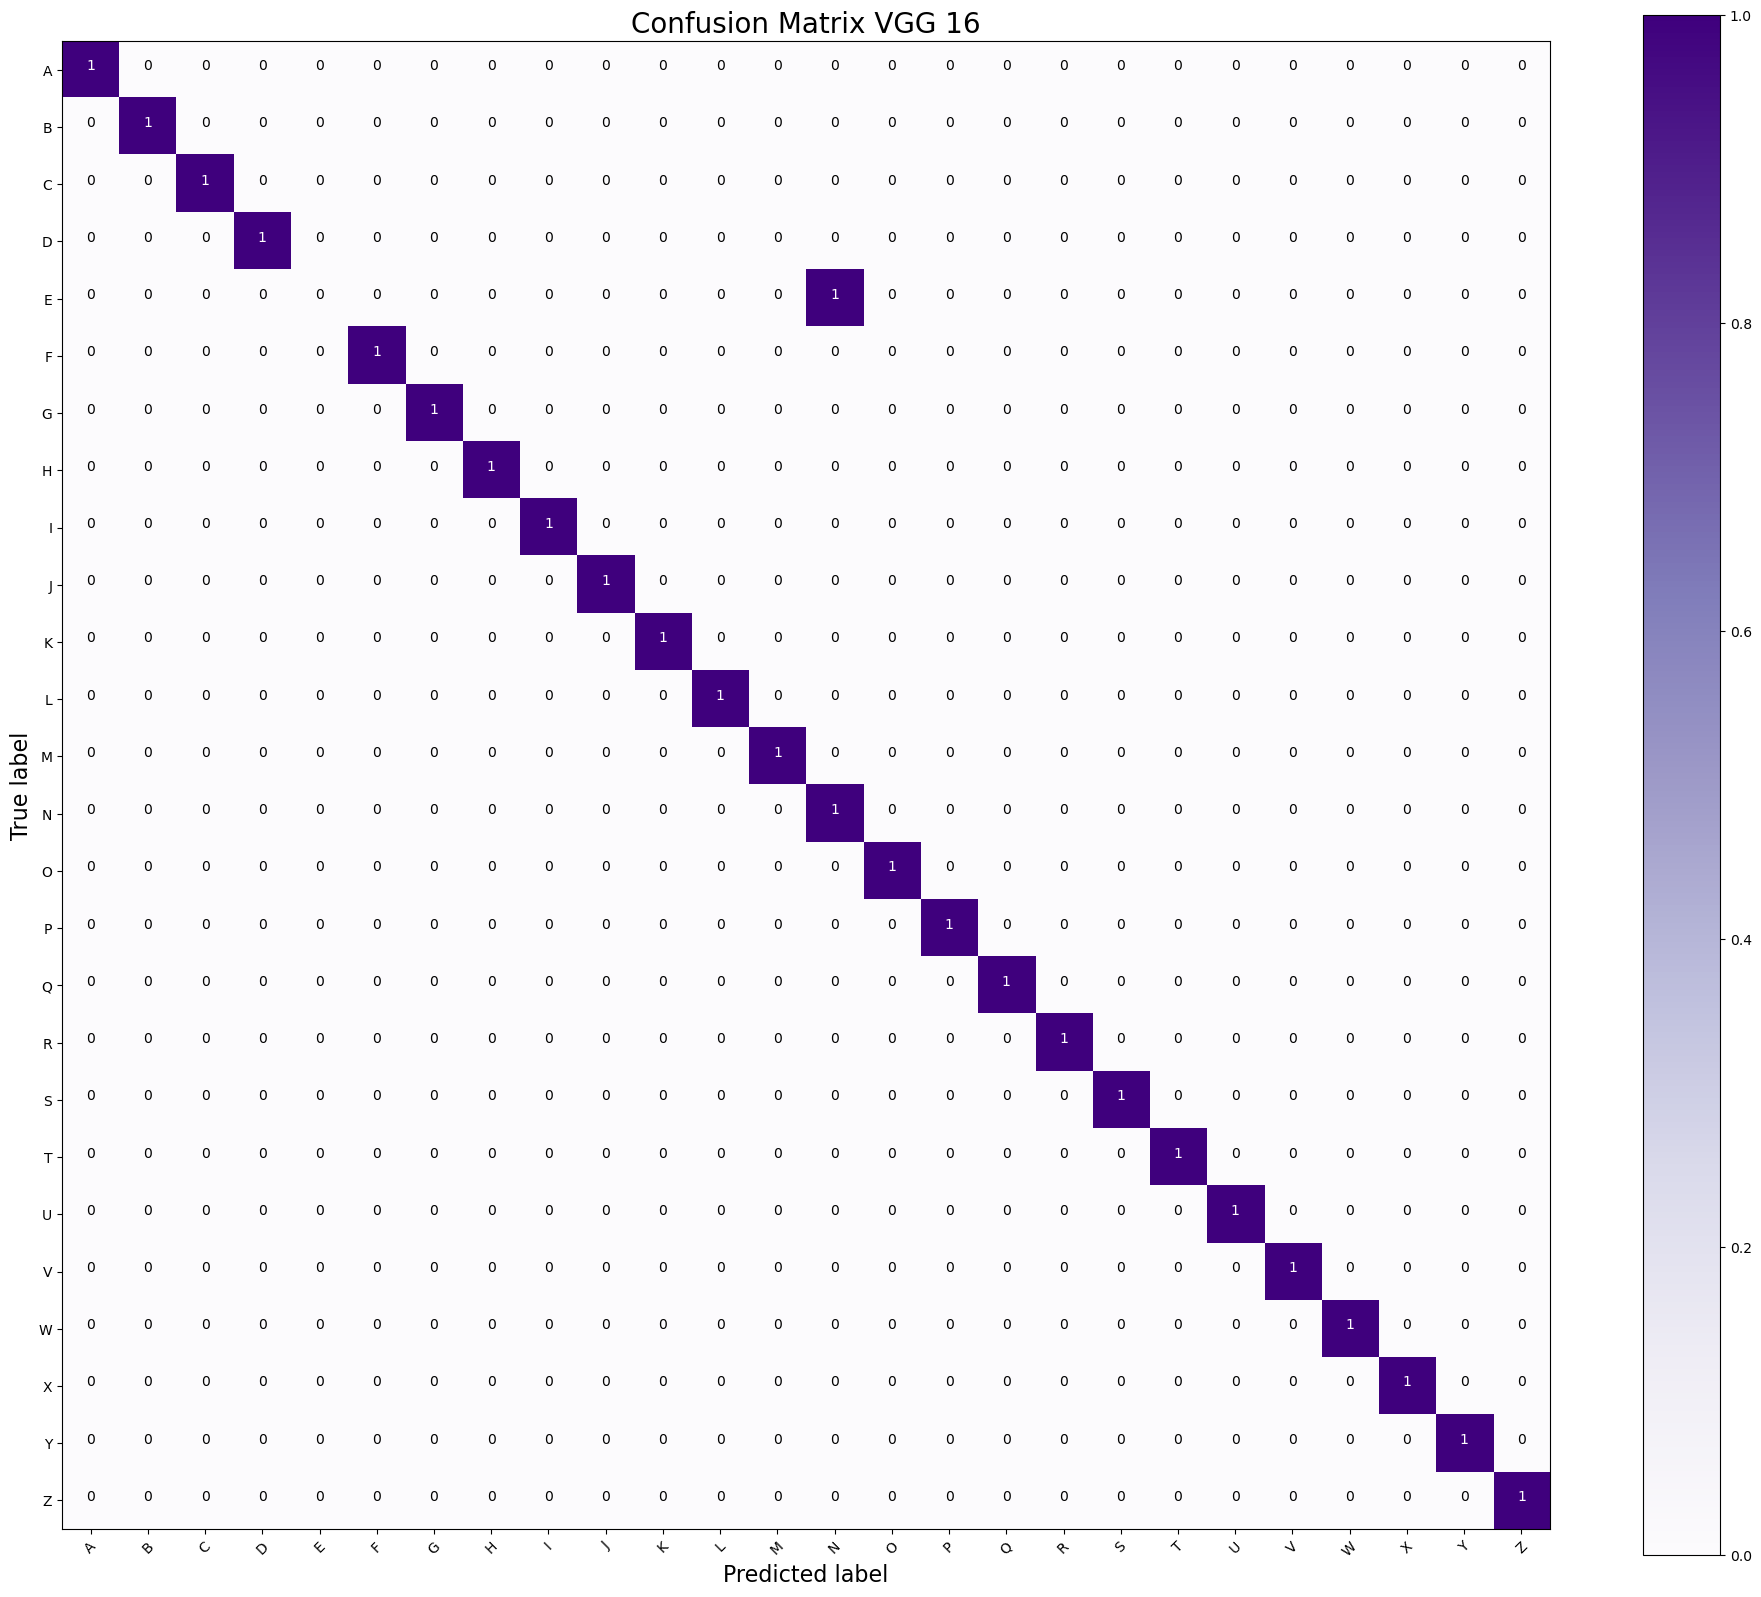

In [35]:
y_eval_pred = model1.predict(X_eval, batch_size = 512,verbose = 0)
plot_confusion_matrix(y_eval, y_eval_pred)

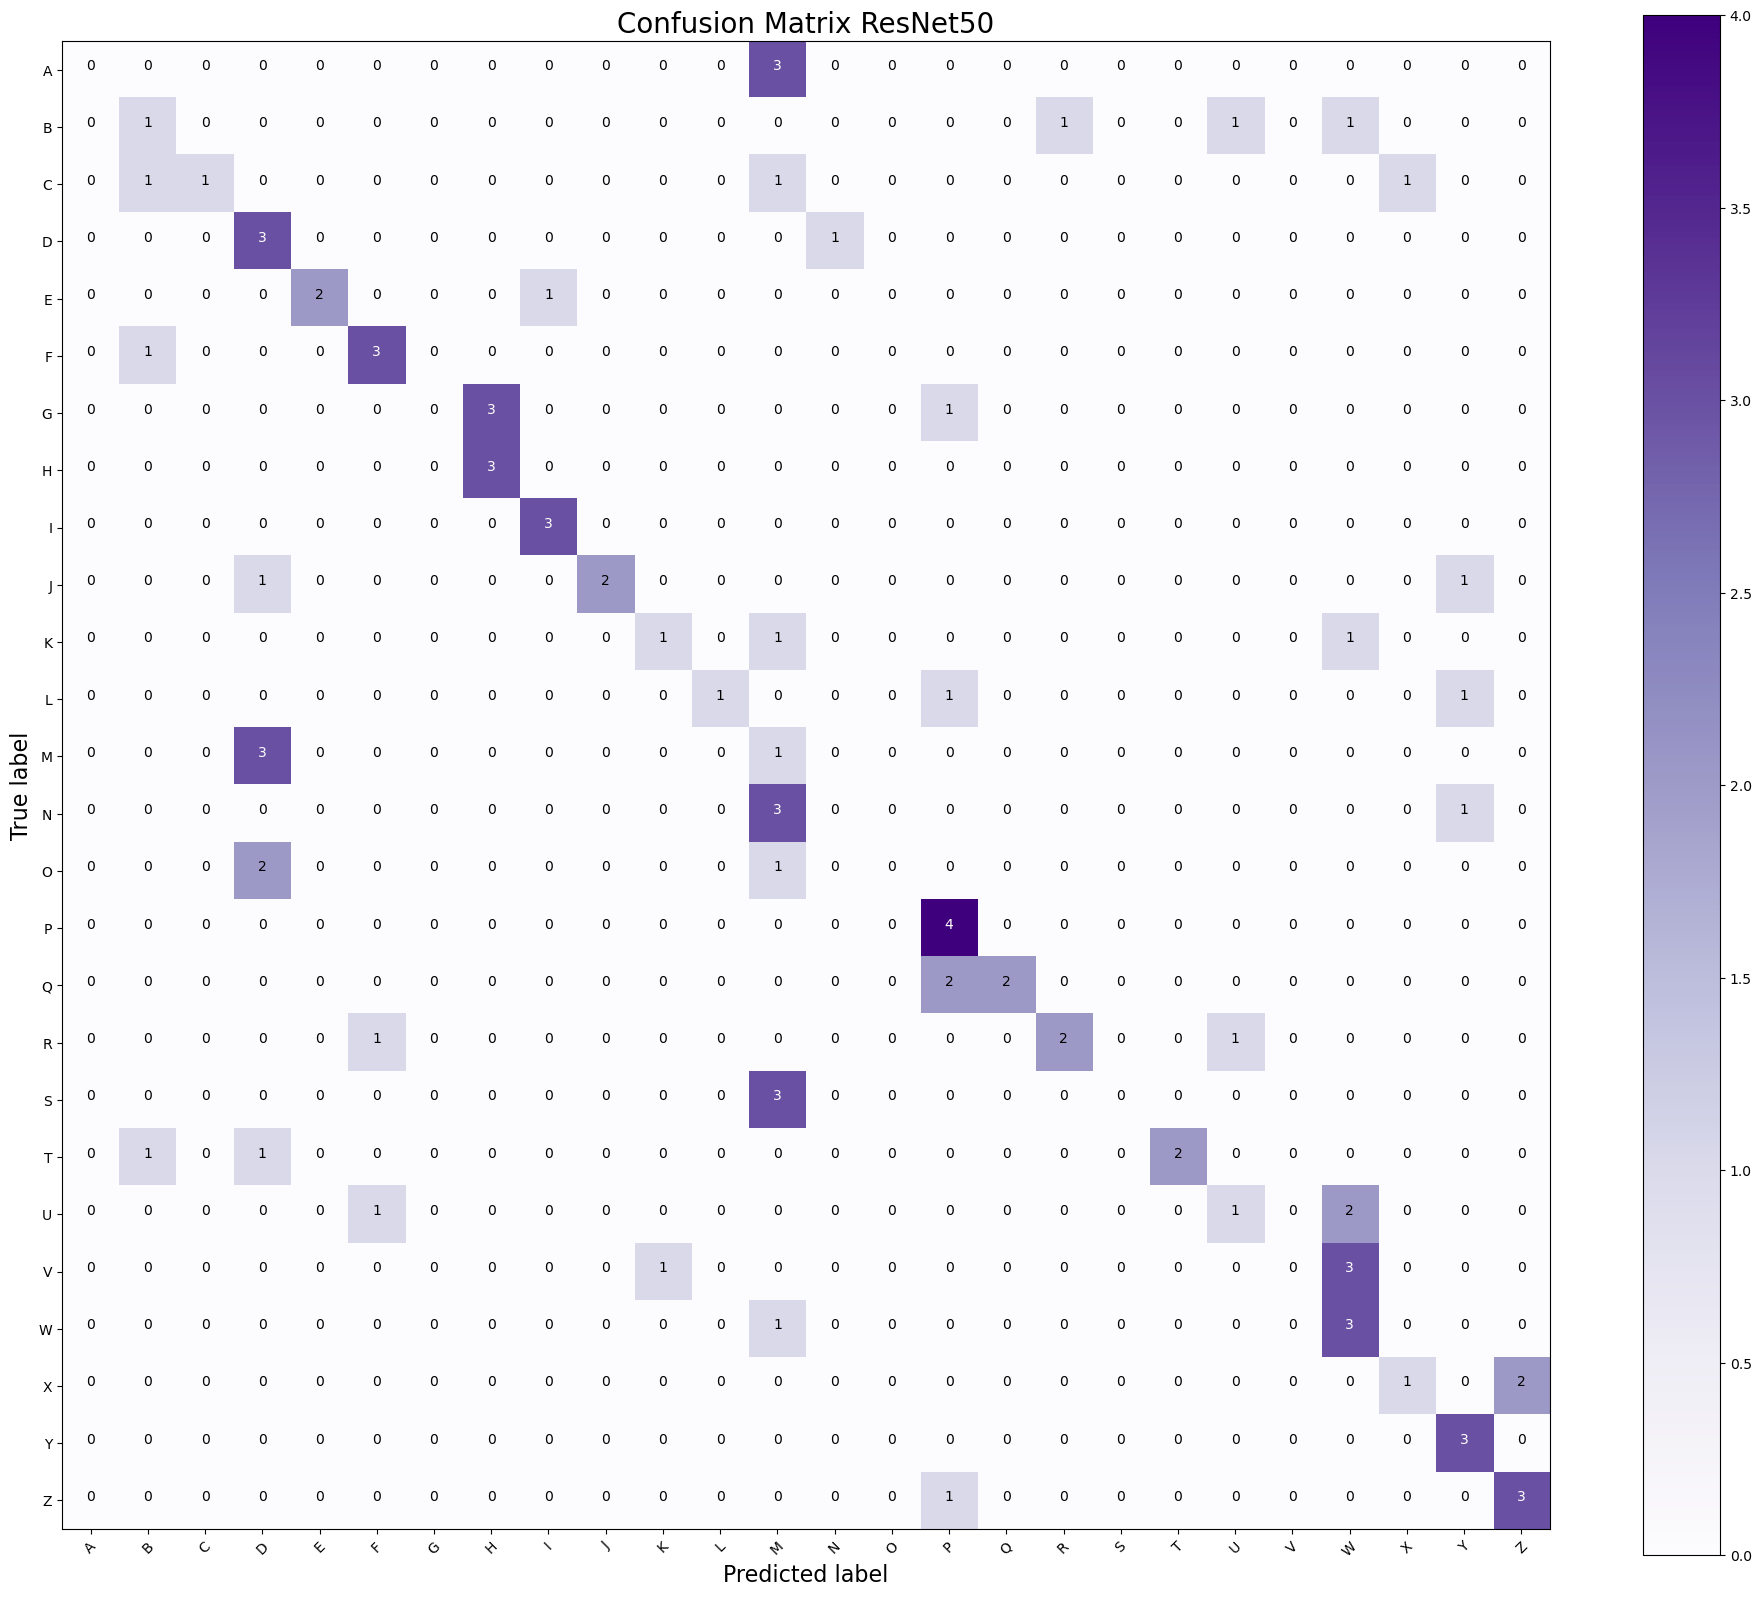

In [36]:
def plot_confusion_matrix(y, y_pred):
    y = np.argmax(y, axis = 1)
    y_pred = np.argmax(y_pred, axis = 1)
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize = (24, 20))
    ax = plt.subplot()
    plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Purples)
    plt.colorbar()
    plt.title("Confusion Matrix ResNet50")
    tick_marks = np.arange(len(uniq_labels))
    plt.xticks(tick_marks, uniq_labels, rotation=45)
    plt.yticks(tick_marks, uniq_labels)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    ax.title.set_fontsize(20)
    ax.xaxis.label.set_fontsize(16)
    ax.yaxis.label.set_fontsize(16)
    limit = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment = "center",color = "white" if cm[i, j] > limit else "black")
    plt.show()

from sklearn.metrics import confusion_matrix
import itertools

y_test_pred = model2.predict(X_test, batch_size = 64, verbose = 0)
plot_confusion_matrix(y_test, y_test_pred)

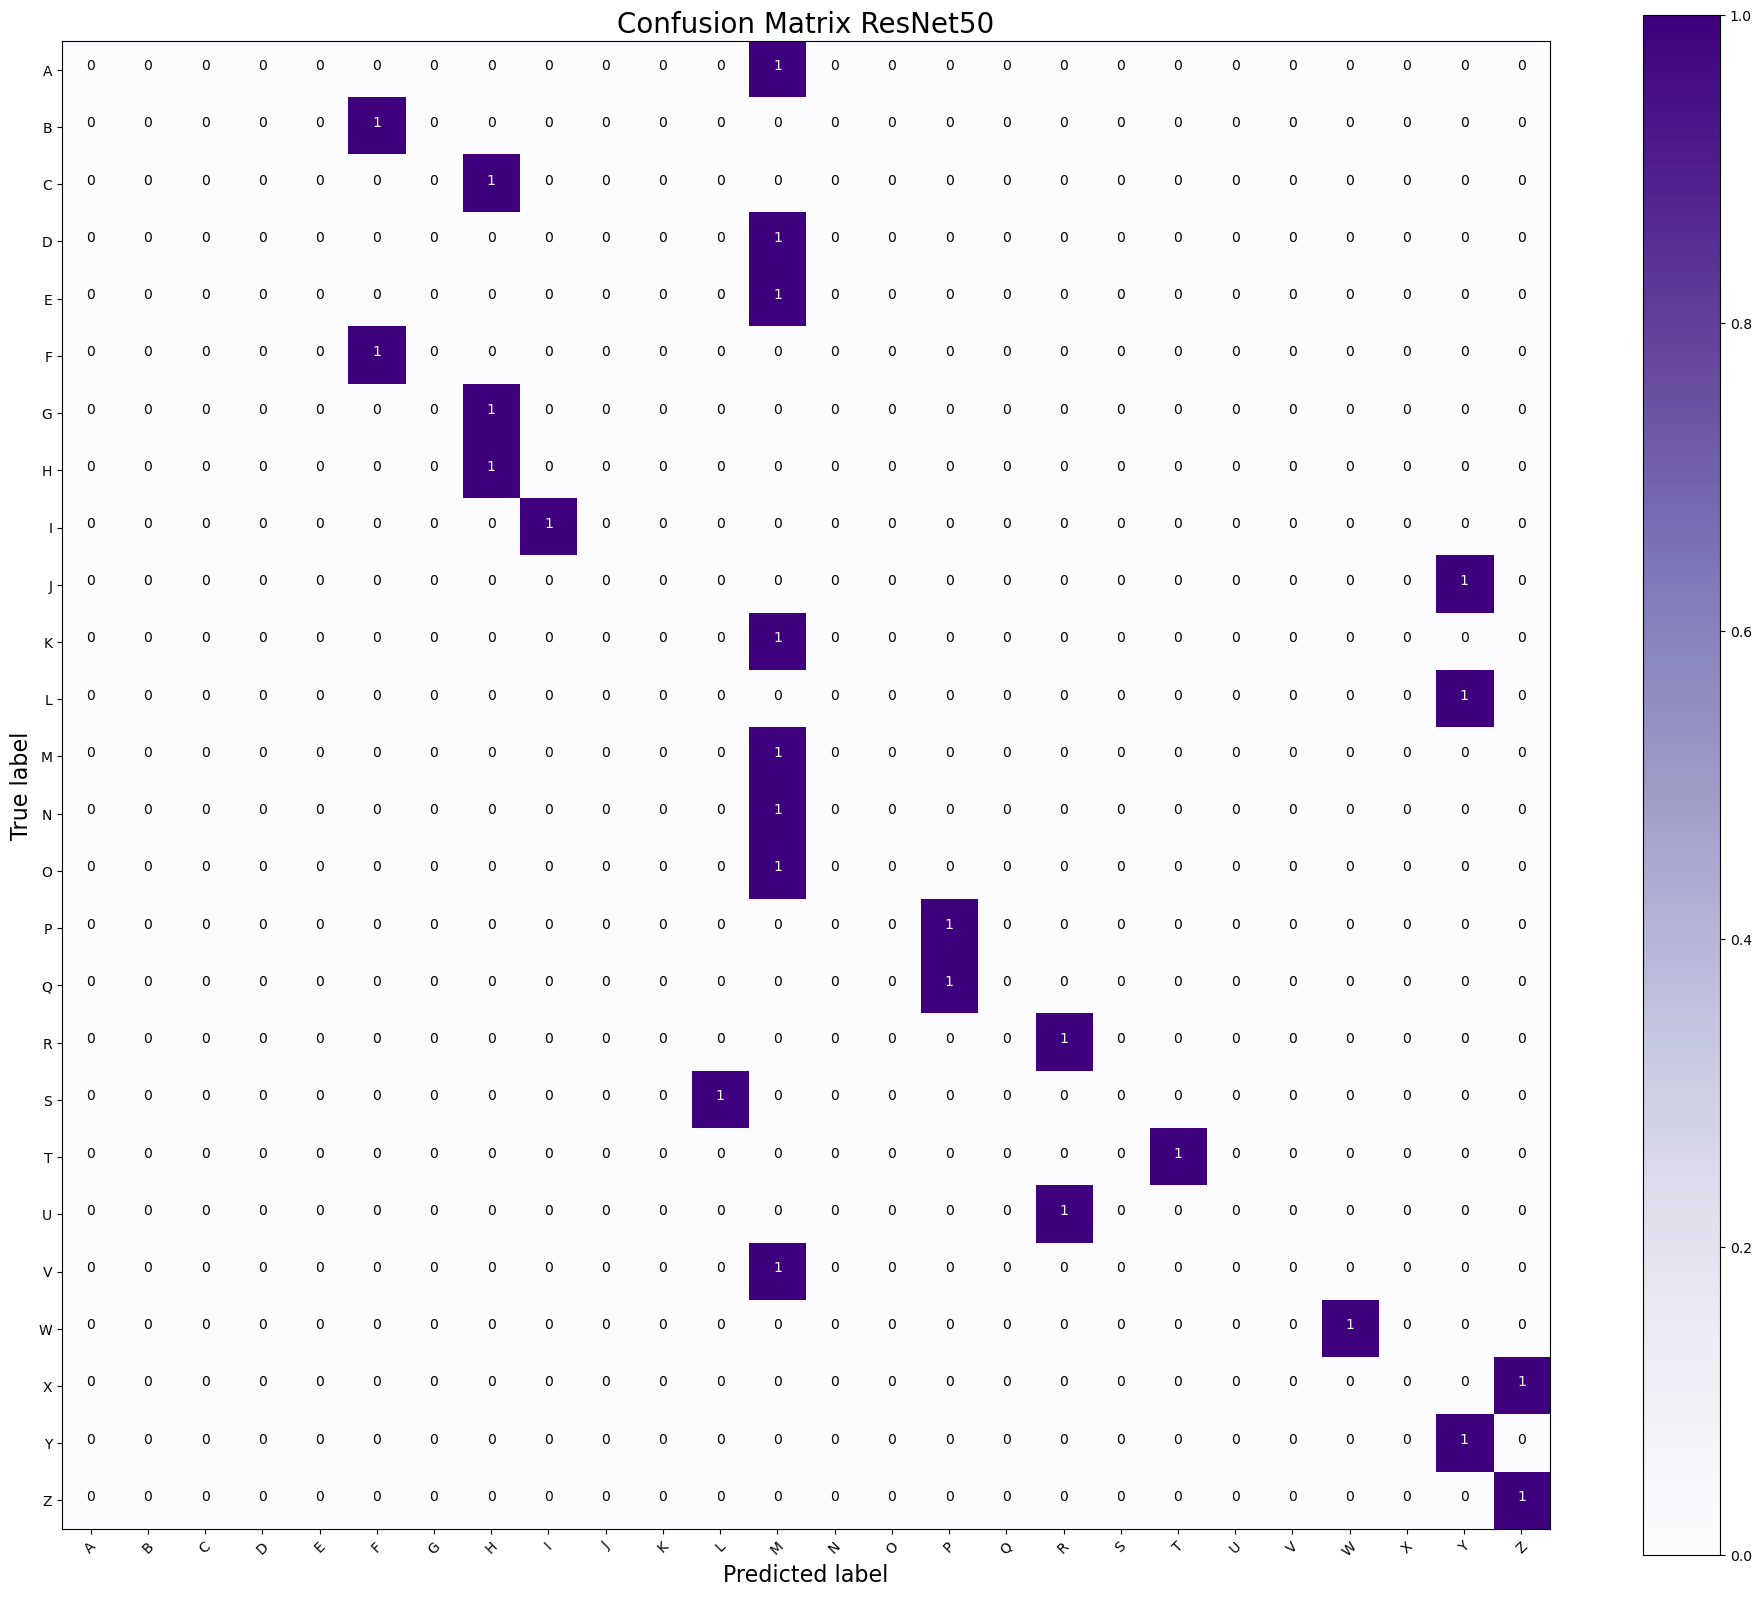

In [37]:
y_eval_pred = model2.predict(X_eval, batch_size = 64, verbose = 0)
plot_confusion_matrix(y_eval, y_eval_pred)

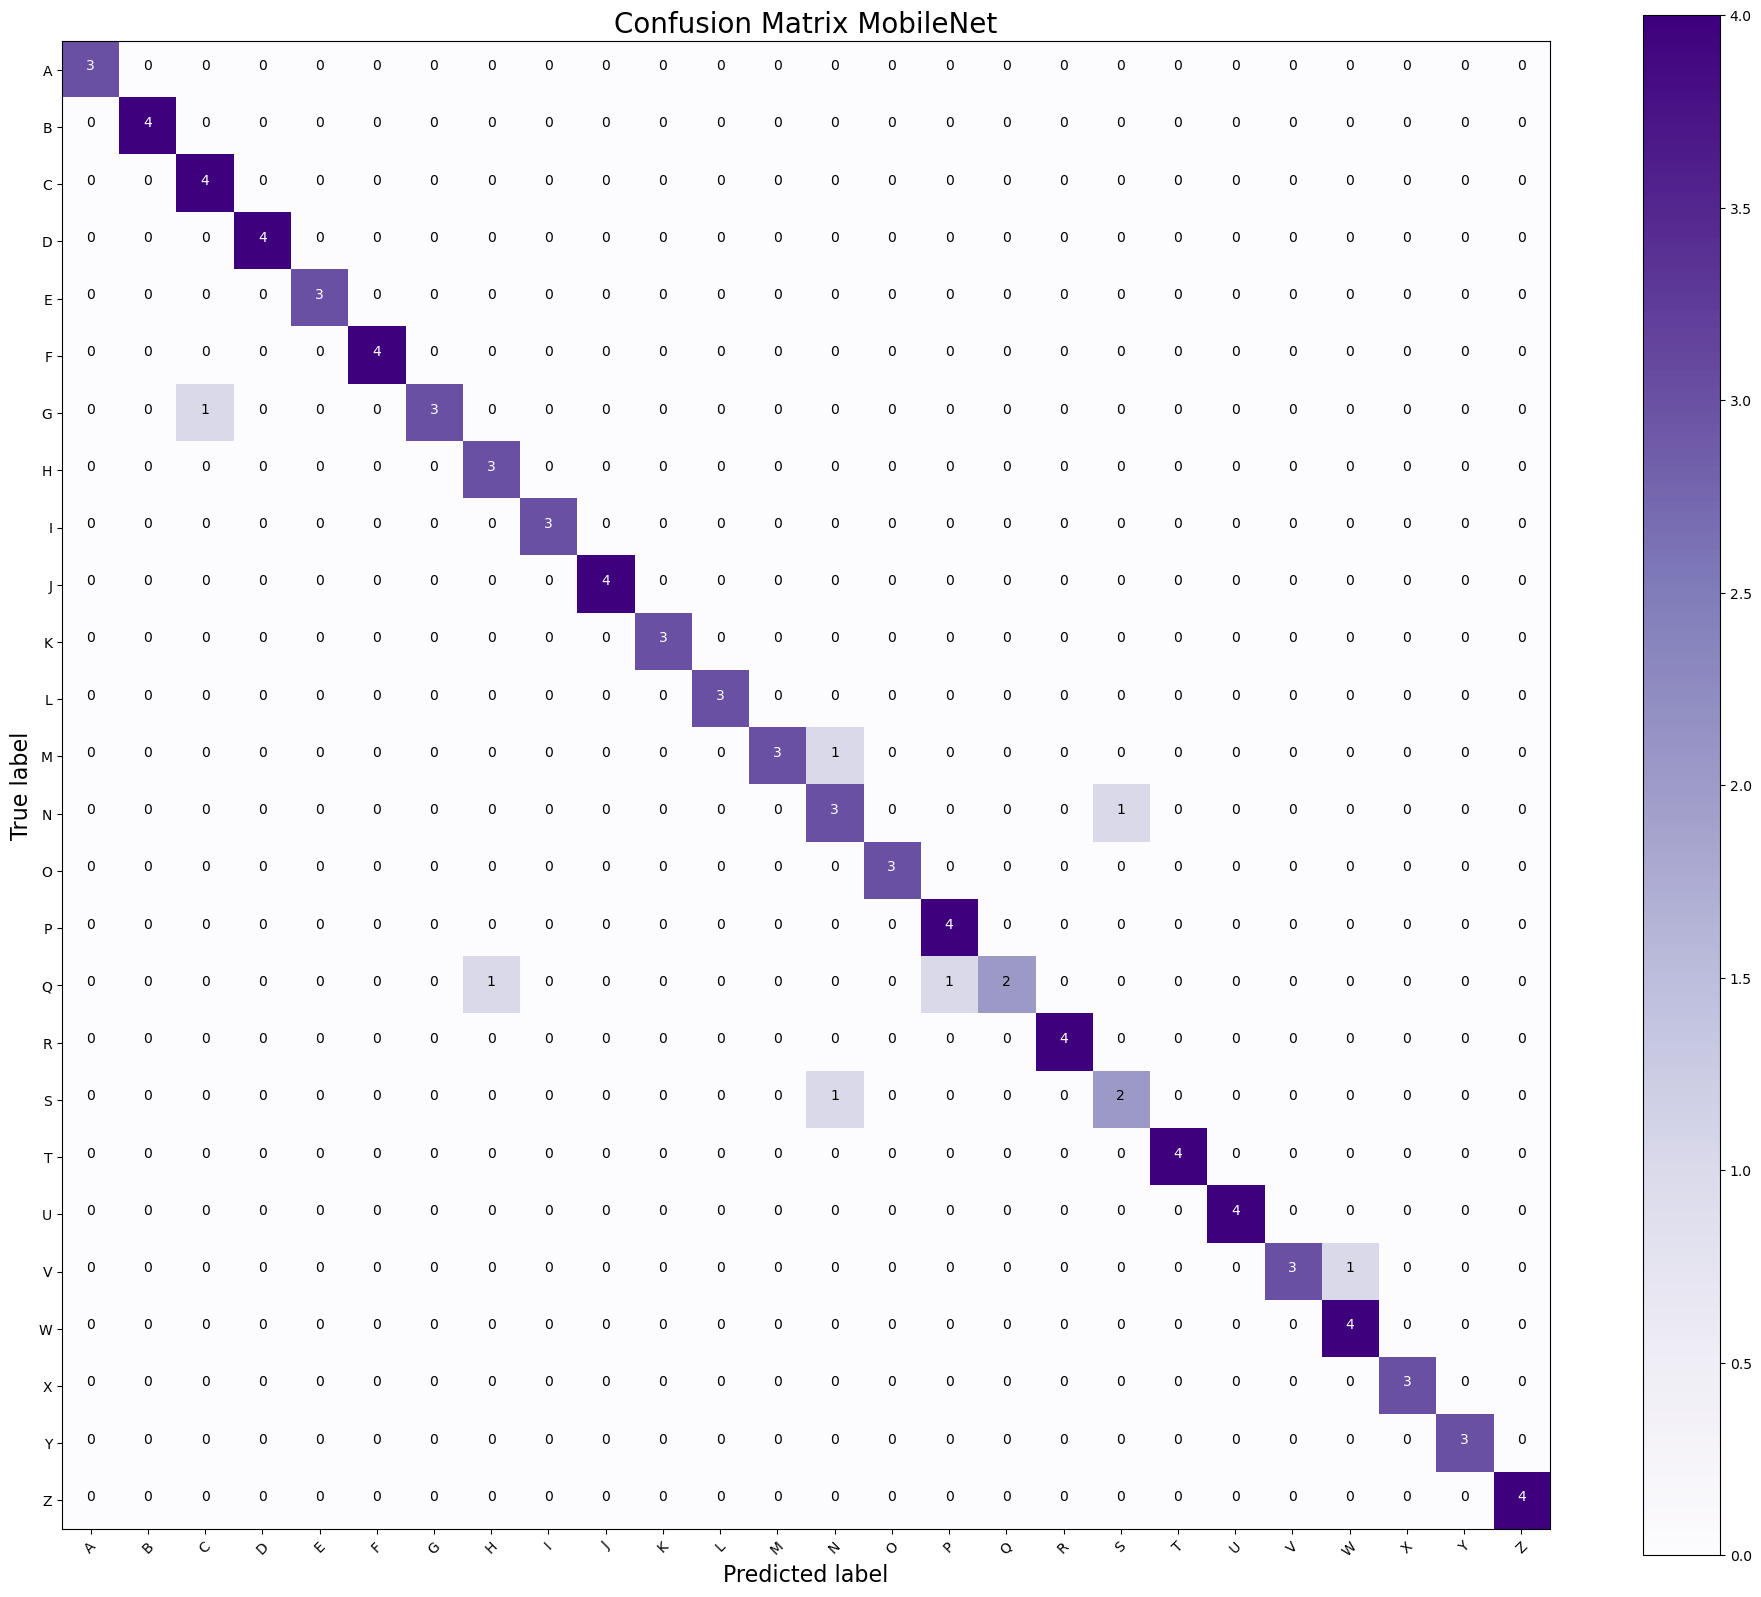

In [38]:
def plot_confusion_matrix(y, y_pred):
    y = np.argmax(y, axis = 1)
    y_pred = np.argmax(y_pred, axis = 1)
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize = (24, 20))
    ax = plt.subplot()
    plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Purples)
    plt.colorbar()
    plt.title("Confusion Matrix MobileNet")
    tick_marks = np.arange(len(uniq_labels))
    plt.xticks(tick_marks, uniq_labels, rotation=45)
    plt.yticks(tick_marks, uniq_labels)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    ax.title.set_fontsize(20)
    ax.xaxis.label.set_fontsize(16)
    ax.yaxis.label.set_fontsize(16)
    limit = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment = "center",color = "white" if cm[i, j] > limit else "black")
    plt.show()

from sklearn.metrics import confusion_matrix
import itertools

y_test_pred = model3.predict(X_test, batch_size = 64, verbose = 0)
plot_confusion_matrix(y_test, y_test_pred)

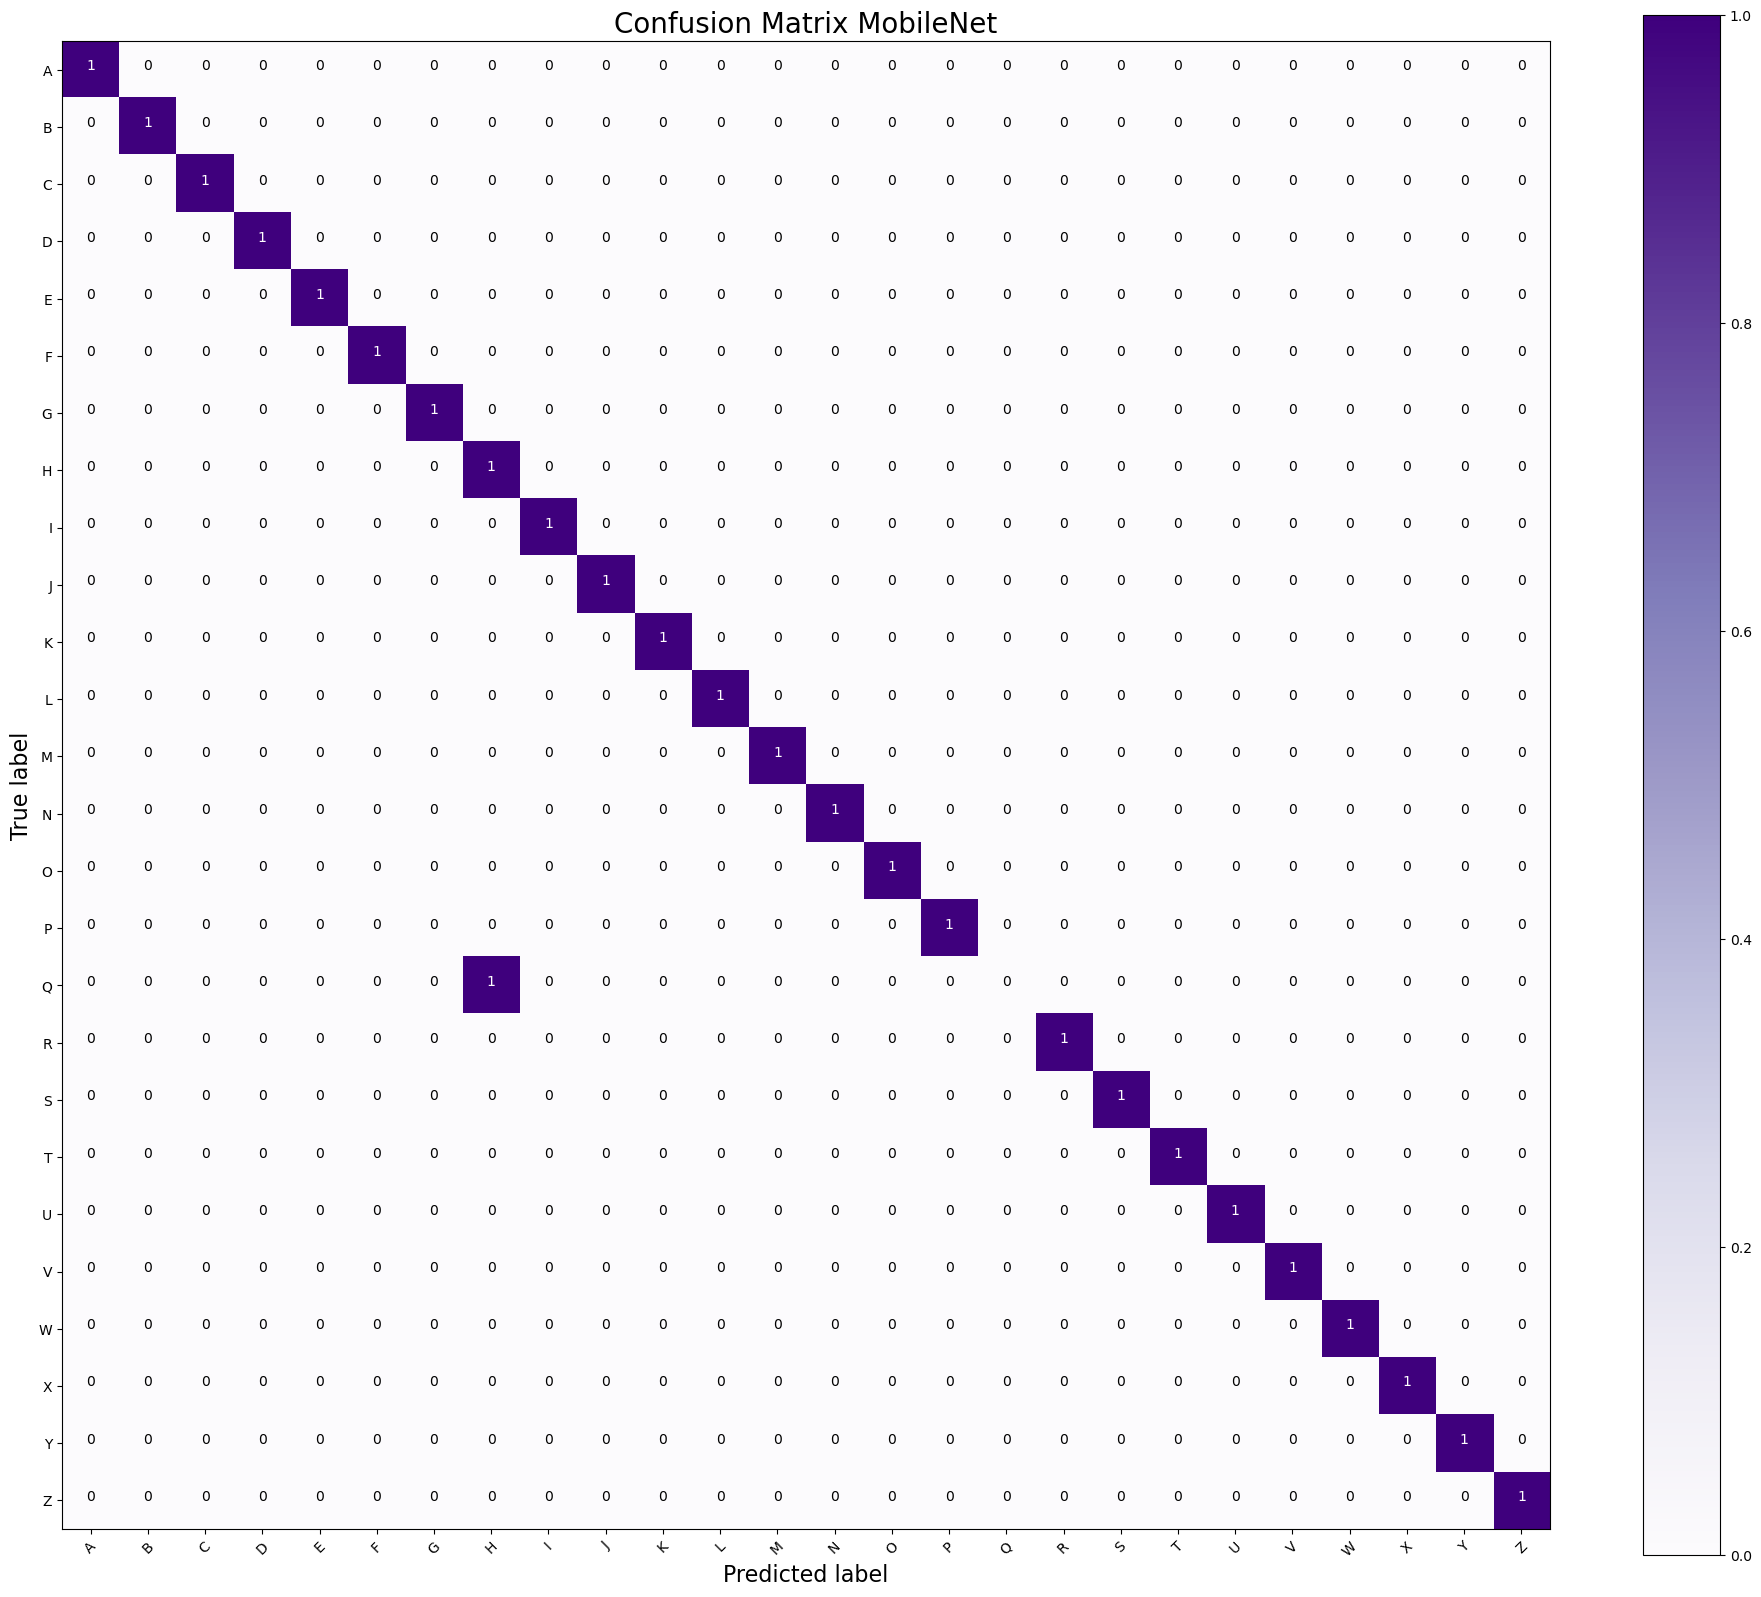

In [39]:
y_eval_pred = model3.predict(X_eval, batch_size = 64, verbose = 0)
plot_confusion_matrix(y_eval, y_eval_pred)